# Overview

In this file I will be handling parts 1 and 2 of the assignment. This will involve the following steps:
- Choosing the dataset and loading it
- Preprocessing the data for the model

In [1]:
import pandas
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# get the data
data = pandas.read_csv(
	"https://raw.githubusercontent.com/NicholasZolton/MLAssignment1/main/data/winequality-red.csv",
	header=0,
	delimiter=";",
)

In [3]:
# print the data
print("Data Overview:")
print(data.describe())

Data Overview:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.

In [4]:
# print any missing values
print("Checking for missing values:")
print(data.isnull().sum())

Checking for missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# print the data types (check for non-numeric data)
print("Data Types:")
print(data.dtypes)
print()

Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object



In [6]:
# check if any rows are identical
print("Checking for duplicate rows:")
print(data.duplicated().sum())

Checking for duplicate rows:
240


In [7]:
# remove the duplicates
print("Removing duplicates...")
data.drop_duplicates(inplace=True)

Removing duplicates...


In [8]:
# check if any rows are identical
print("Checking for duplicate rows:")
print(data.duplicated().sum())

Checking for duplicate rows:
0


Correlation:


<Axes: >

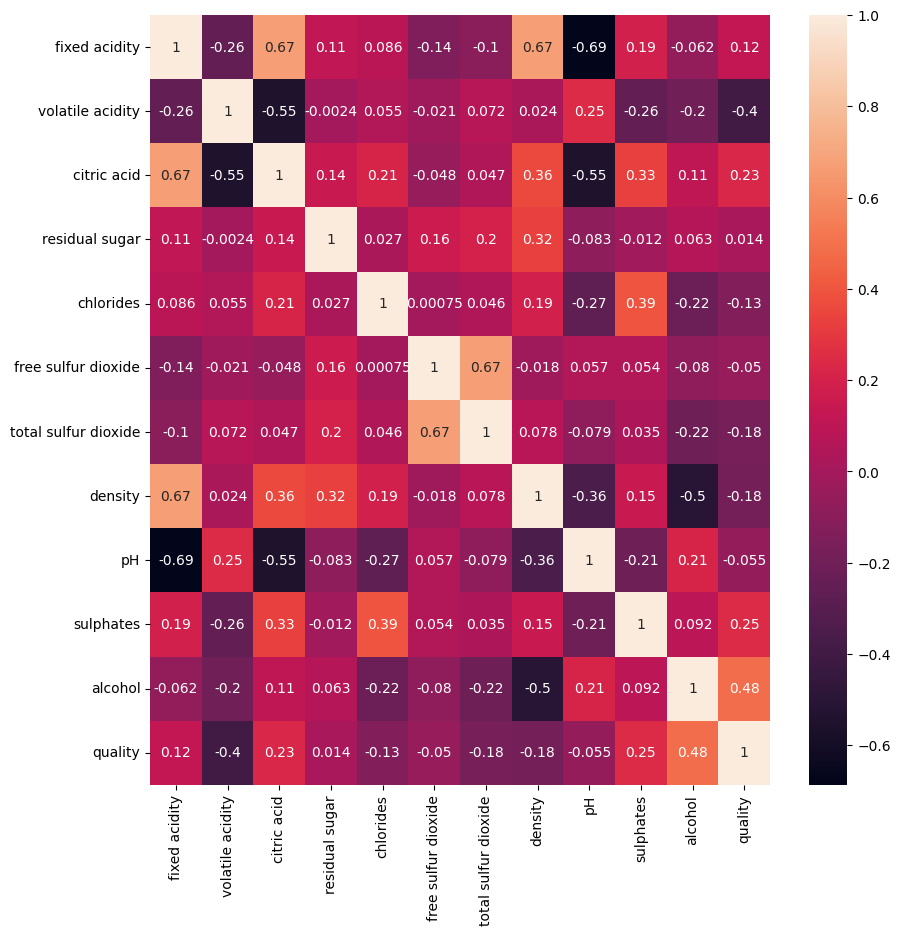

In [9]:
# check correlation
print("Correlation:")
plt.figure(figsize=(10, 10))
sns.heatmap(data=data.corr(), annot=True, )

### Notes

It looks like there are a few fields which have an insignificant impact on the quality. These fields are:

- pH
- free sulfur dioxide
- residual sugar

For now, I will remove these fields and see how the model performs.


In [10]:
# remove the fields with little correlation
print("Removing fields with little correlation...")
data = data.drop(columns=["pH", "free sulfur dioxide", "residual sugar"])
print(data.describe())

Removing fields with little correlation...
       fixed acidity  volatile acidity  citric acid    chlorides  \
count    1359.000000       1359.000000  1359.000000  1359.000000   
mean        8.310596          0.529478     0.272333     0.088124   
std         1.736990          0.183031     0.195537     0.049377   
min         4.600000          0.120000     0.000000     0.012000   
25%         7.100000          0.390000     0.090000     0.070000   
50%         7.900000          0.520000     0.260000     0.079000   
75%         9.200000          0.640000     0.430000     0.091000   
max        15.900000          1.580000     1.000000     0.611000   

       total sulfur dioxide      density    sulphates      alcohol  \
count           1359.000000  1359.000000  1359.000000  1359.000000   
mean              46.825975     0.996709     0.658705    10.432315   
std               33.408946     0.001869     0.170667     1.082065   
min                6.000000     0.990070     0.330000     8.4000

In [11]:
from sklearn.preprocessing import StandardScaler
# now we need to normalize the data
print('Normalizing data...')
scaler = StandardScaler()
data = pandas.DataFrame(scaler.fit_transform(data), columns=data.columns)

Normalizing data...


In [12]:
# print the normalized data
print('Normalized Data:')
print(data.describe())

Normalized Data:
       fixed acidity  volatile acidity   citric acid     chlorides  \
count   1.359000e+03      1.359000e+03  1.359000e+03  1.359000e+03   
mean   -6.274108e-16      1.463959e-16  2.091369e-17  4.182739e-17   
std     1.000368e+00      1.000368e+00  1.000368e+00  1.000368e+00   
min    -2.137008e+00     -2.238023e+00 -1.393258e+00 -1.542254e+00   
25%    -6.972071e-01     -7.623226e-01 -9.328165e-01 -3.671819e-01   
50%    -2.364707e-01     -5.180013e-02 -6.309377e-02 -1.848432e-01   
75%     5.122260e-01      6.040667e-01  8.066290e-01  5.827504e-02   
max     4.370894e+00      5.741690e+00  3.722758e+00  1.059340e+01   

       total sulfur dioxide       density     sulphates       alcohol  \
count          1.359000e+03  1.359000e+03  1.359000e+03  1.359000e+03   
mean           4.182739e-17  5.286982e-14 -5.542129e-16  1.463959e-16   
std            1.000368e+00  1.000368e+00  1.000368e+00  1.000368e+00   
min           -1.222457e+00 -3.553604e+00 -1.926712e+00 -1.8

In [23]:
import os
# now we need to save the data to a new file so that we can use it in the next steps
file_path = os.getcwd() + r'\..\data\winequality-red-preprocessed.csv'
print(f'Saving preprocessed data to {file_path}...')

# uncomment the following line to save to the specified file path
# data.to_csv(file_path, index=False)

Saving preprocessed data to c:\Users\Nicholas\Documents\GitHub\MLAssignment1\mlassignment1\..\data\winequality-red-preprocessed.csv...
